# Question 1

In [1]:
import numpy as np
import random
from sklearn.metrics import r2_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import train_test_split

## Generate dataset

In [3]:
mean=np.array([10, 6, 4, 8, 4, 2, 9])
cov = np.array(make_spd_matrix(n_dim=7, random_state=0))

rng=np.random.default_rng()
X=np.array(rng.multivariate_normal(mean, cov, size=1000))

Y=np.array([])
for i in range(0, 1000):
    Y=np.append(Y, random.randint(0, 1000))


df=pd.DataFrame(data=X)
df=df.join(pd.DataFrame(data=Y, columns=['output']))
df

,0,1,2,3,4,5,6,output
0,8.957509,5.054379,2.910195,9.480900,4.058703,0.986910,8.039733,50.0
1,7.094815,7.525144,1.274435,8.668709,2.785100,-0.313601,8.405072,312.0
2,11.391662,4.530901,5.895992,7.509716,4.776738,2.665768,8.912515,498.0
3,11.645845,5.439163,4.796746,6.921407,4.526010,2.473019,9.744516,8.0
4,9.439246,8.098484,3.574289,8.130265,2.633095,0.499065,8.371009,397.0
...,...,...,...,...,...,...,...,...
995,7.252033,7.599205,1.520344,10.531166,1.716121,1.216096,7.470193,540.0
996,11.349819,5.529336,5.691926,8.086103,4.922587,2.306740,9.886666,97.0
997,12.414198,3.162633,7.901711,6.357995,5.074839,3.574111,9.978927,342.0
998,11.112104,4.724347,4.708658,7.207454,3.788487,2.800688,9.082017,15.0


In [4]:
df

,0,1,2,3,4,5,6,output
0,8.957509,5.054379,2.910195,9.480900,4.058703,0.986910,8.039733,50.0
1,7.094815,7.525144,1.274435,8.668709,2.785100,-0.313601,8.405072,312.0
2,11.391662,4.530901,5.895992,7.509716,4.776738,2.665768,8.912515,498.0
3,11.645845,5.439163,4.796746,6.921407,4.526010,2.473019,9.744516,8.0
4,9.439246,8.098484,3.574289,8.130265,2.633095,0.499065,8.371009,397.0
...,...,...,...,...,...,...,...,...
995,7.252033,7.599205,1.520344,10.531166,1.716121,1.216096,7.470193,540.0
996,11.349819,5.529336,5.691926,8.086103,4.922587,2.306740,9.886666,97.0
997,12.414198,3.162633,7.901711,6.357995,5.074839,3.574111,9.978927,342.0
998,11.112104,4.724347,4.708658,7.207454,3.788487,2.800688,9.082017,15.0


Text(0.5, 1.0, 'Pearson Correlation Heatmap')

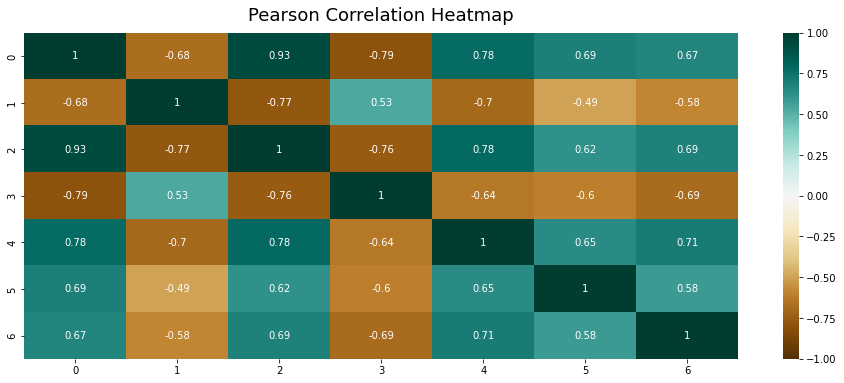

In [5]:
plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df.iloc[:,0:7].corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap',fontdict={'fontsize':18},pad=12)

## Ridge Regression using Gradient Descent

In [6]:
X

array([[ 8.95750948,  5.05437942,  2.91019469, ...,  4.05870349,
         0.98691004,  8.03973298],
       [ 7.09481479,  7.52514372,  1.2744355 , ...,  2.78509991,
        -0.31360129,  8.40507179],
       [11.39166159,  4.53090129,  5.8959916 , ...,  4.7767383 ,
         2.66576839,  8.91251507],
       ...,
       [12.41419802,  3.16263252,  7.9017105 , ...,  5.07483942,
         3.57411064,  9.97892709],
       [11.11210363,  4.72434676,  4.70865781, ...,  3.78848653,
         2.80068834,  9.08201703],
       [ 5.67504347,  6.86101501, -0.07169201, ...,  2.42088505,
         1.19013285,  7.53944035]])

In [7]:
Y

array([ 50., 312., 498.,   8., 397., 415., 808., 964., 507., 717., 254.,
       763., 738., 431., 814., 844., 267., 161., 811., 516., 782., 697.,
       983., 243., 247., 172., 271., 380., 440., 622., 593., 197.,  81.,
       506.,  84.,  85., 909., 864., 348., 791., 353., 616.,  44., 882.,
       164., 359., 230., 146., 436.,  57., 398.,  22., 391., 931., 106.,
       283., 730., 722.,  63., 722., 440., 309., 180., 767., 923.,   0.,
       882., 305., 587., 218., 915., 418., 156., 747., 304., 519., 349.,
        97., 953., 282., 603., 456.,  57., 535., 320., 199., 627., 348.,
       580., 286., 952., 611., 926., 193., 874., 744.,  43., 533.,  94.,
       347., 661., 150., 408., 882., 474.,  30., 516., 869., 227., 494.,
       796., 389., 845., 170.,  12., 857., 828., 399.,  78., 822., 632.,
       935., 174., 707.,  56., 431., 366., 841., 698.,  29., 480., 483.,
       142., 438., 362., 763., 812., 904., 913., 290., 437., 305., 144.,
       930., 404., 862., 562., 463., 723., 378., 10

In [30]:
learning_rates=[0.0001, 0.001, 0.01, 0.1, 1, 10]
regularization_parameters=[1e-15, 1e-10, 1e-5, 1e-3, 0.1, 10, 20]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

# X_test.shape  -> 300, 7
# X_train.shape -> 700, 7
# Y_train.shape  -> 700,
# Y_test.shape   -> 300,
#Prepend X_test with a column of 1s
# X_test
no_of_rows, no_of_columns=X_test.shape
# X_test
X_ones=np.ones((no_of_rows, 1))
# X_ones
# np.stack - > Split an array into multiple sub-arrays horizontally (column-wise).
X_test_with_ones=np.hstack((X_ones, X_test))
# X_test_with_ones

#Prepend X_train with a column of 1s
no_of_rows, no_of_columns=X_train.shape
X_ones=np.ones((no_of_rows, 1))
X_train_with_ones=np.hstack((X_ones, X_train))



no_of_iterations=10
alpha=1e-5
lamda=0

for alpha in learning_rates:
    for lamda in regularization_parameters:
        B=[0]*(no_of_columns+1)
        for iteration in range(0, no_of_iterations):
            
            new_B=[]
            for beta_index in range(0, len(B)):
                
                cost=0
                sum=0
                for row_index in range(0, no_of_rows):
                    
                    BX_sum=0
                    for i in range(0, len(B)):
                        BX_sum=BX_sum + B[i]*X_train_with_ones[row_index][i]                            
                    
                    cost=cost+ pow(Y_train[row_index]-BX_sum, 2) + lamda*np.sum(np.square(B))    
                    sum = sum + (BX_sum - Y_train[row_index]) * X_train_with_ones[row_index][beta_index]   
                
                cost=(1/(2*no_of_rows)) * cost
                new_B_val = B[beta_index]*(1-alpha*lamda/no_of_rows) - (alpha/no_of_rows)*sum
                new_B.append(new_B_val)

            B=new_B
            B
        #Calculate Y_predicted
        Y_predicted=np.matmul(X_test_with_ones, B)
        print(f"alpha={alpha}\tlambda={lamda}\tCost={cost}\t\tR2 Score={r2_score(Y_test, Y_predicted)}")
    print("")


alpha=0.0001	lambda=1e-15	Cost=103308.8632359552		R2 Score=-1.5360476358438482
alpha=0.0001	lambda=1e-10	Cost=103308.86323595651		R2 Score=-1.5360476358438482
alpha=0.0001	lambda=1e-05	Cost=103308.86346545079		R2 Score=-1.5360476358508701
alpha=0.0001	lambda=0.001	Cost=103308.88618543476		R2 Score=-1.5360476365460403
alpha=0.0001	lambda=0.1	Cost=103311.15818377645		R2 Score=-1.5360477060630822
alpha=0.0001	lambda=10	Cost=103538.35548229814		R2 Score=-1.5360546577488443
alpha=0.0001	lambda=20	Cost=103767.84260619798		R2 Score=-1.5360616796165916

alpha=0.001	lambda=1e-15	Cost=39249.63432660727		R2 Score=-0.030148405525942445
alpha=0.001	lambda=1e-10	Cost=39249.634326640866		R2 Score=-0.030148405525942668
alpha=0.001	lambda=1e-05	Cost=39249.63771165455		R2 Score=-0.030148405534194955
alpha=0.001	lambda=0.001	Cost=39249.97283139178		R2 Score=-0.03014840635121585
alpha=0.001	lambda=0.1	Cost=39283.484779132115		R2 Score=-0.030148488053667988
alpha=0.001	lambda=10	Cost=42634.41999826872		R2 

In [28]:
B

[-1.5551950491785537e+35,
 -1.5558734920060065e+36,
 -9.363985158867144e+35,
 -6.300645291189052e+35,
 -1.2416747596212372e+36,
 -6.198583854385638e+35,
 -3.055672982174149e+35,
 -1.402244142453959e+36]

In [24]:
X_test

array([[ 8.77540678,  7.96784833,  2.52988277, ...,  3.03109358,
         2.31532717,  8.2770502 ],
       [11.19428629,  6.6522285 ,  5.09999916, ...,  4.26734667,
         1.56682265,  9.16014272],
       [ 8.8143312 ,  6.37879623,  3.19183557, ...,  3.51493507,
         2.44335825,  9.66766797],
       ...,
       [10.66289143,  5.98340086,  5.20464003, ...,  4.75980806,
         1.88287766,  9.61400562],
       [ 9.69998591,  3.87946301,  4.049897  , ...,  4.37817254,
         2.58452714, 10.48161762],
       [ 9.23978535,  7.64635575,  3.15818293, ...,  2.8954742 ,
         1.89800848,  7.80179874]])

### The best parameters are alpha=0.001 and lambda=1e-15

# Question 2

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
df=pd.read_csv('/content/Hitters (1).csv')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


## (a) Data Preprocessing

### Null values

In [43]:
import missingno as msn

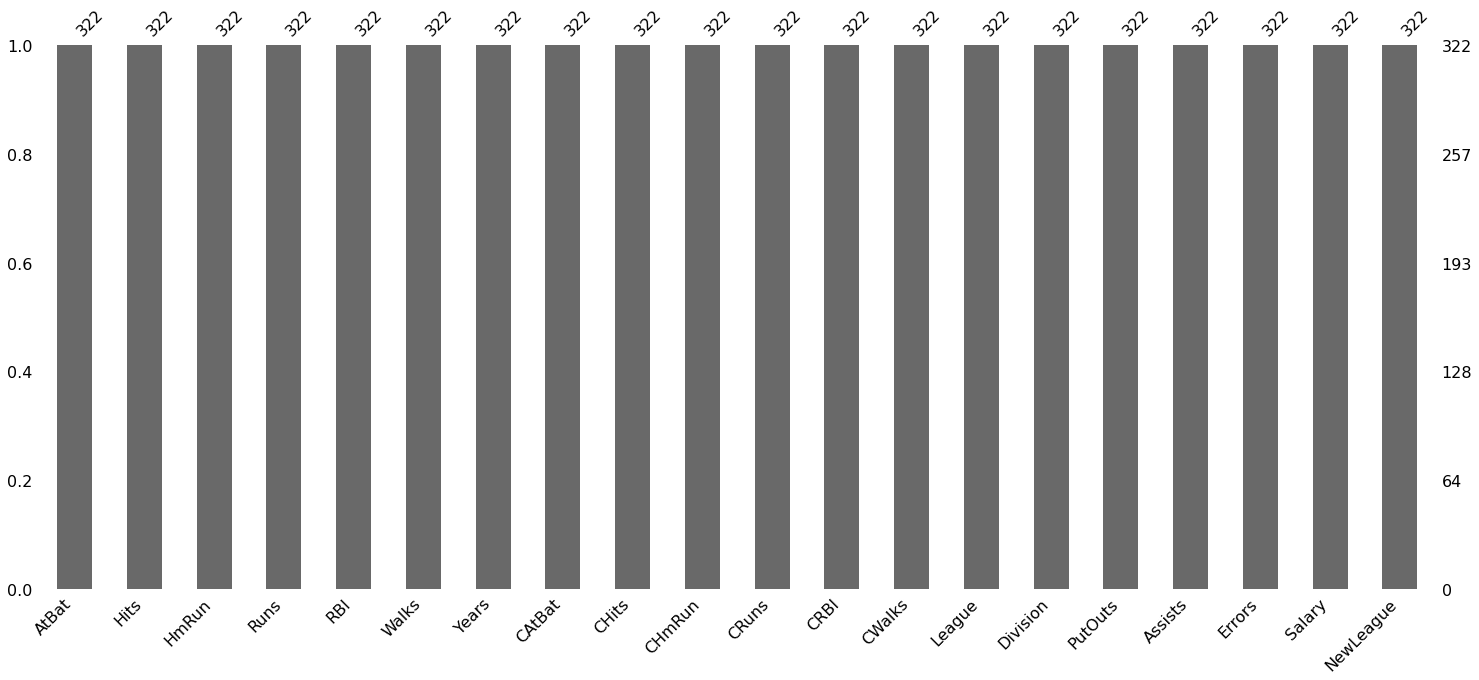

In [44]:
msn.bar(df)

In [45]:
for feature in df.columns:
  if  df[feature].isnull().sum()>0:
    df.fillna(df[feature].mean(),inplace=True) # replacce it with mean 

In [47]:
print(df.NewLeague.unique())
print(df.League.unique())
print(df.Division.unique())

['A' 'N']
['A' 'N']
['E' 'W']


In [48]:
for feature in df.columns:
  if df[feature].dtype == object:
    print(feature)

League
Division
NewLeague


In [50]:
# A = 1, N = 0 
# E = 1, W = 0
df['League'].replace('A',1,inplace=True)
df['League'].replace('N',0,inplace=True)
df['NewLeague'].replace('A',1,inplace=True)
df['NewLeague'].replace('N',0,inplace=True)
df['Division'].replace('E',1,inplace=True)
df['Division'].replace('W',0,inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    int64  
 14  Division   322 non-null    int64  
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    int64  
dtypes: float64

## (b) Separate X & Y and Perform Scaling

In [54]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.25)

In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [57]:
# Appening a column of 1 to consider beta[0][0]
X_train_inserting = np.insert(X_train_scaled,0,1,axis=1)
X_test_inserting = np.insert(X_test_scaled,0,1,axis=1)

In [59]:
X_train_scaled

array([[-0.39752209, -0.56485126, -0.67097354, ..., -0.65436448,
        -0.77786898, -1.0395114 ],
       [ 0.78043454,  0.79170311, -0.43729634, ...,  1.8317234 ,
         0.31568516,  0.81893145],
       [ 1.29174538,  1.45921399, -0.32045774, ..., -0.67682913,
         0.00324112, -0.78837047],
       ...,
       [ 0.28206827, -0.09113386,  1.43212127, ..., -0.69180556,
        -0.1529809 ,  0.0301628 ],
       [-0.47518956, -0.32799256, -0.78781214, ..., -0.72924664,
        -0.77786898,  0.0301628 ],
       [-0.9282498 , -1.08163388, -1.02148934, ...,  0.22175685,
         0.31568516, -0.37398795]])

c)Fit a Linear, Ridge (use regularization parameter as 0.5748), and LASSO (use regularization parameter as 0.5748) regression function on the dataset. (d) Evaluate the performance of each trained model on test set. Which model performs the best and Why?

In [60]:
def r2Score(Y_pred,Y_test=Y_test):
  error = Y_pred - Y_test
  sse = np.sum(error**2)
  # getting the total variance of the model
  sst = np.sum((Y_test - np.mean(Y_test))**2)
  # r2score = 1- (SSE)/(SST)  1 - unexplained/total
  r2score = 1- ((sse)/(sst))
  return r2score*100

In [61]:
## LINEAR
A = X_train_inserting.T.dot(X_train_inserting)
B = np.linalg.inv(A)
C = B.dot(X_train_inserting.T)
beta_linear = C.dot(Y_train)

In [62]:
Y_pred_linear = X_test_inserting.dot(beta_linear)

In [63]:
r2Score(Y_pred_linear)

72.88508942850825

In [64]:
## RIDGE
lamda = 0.5784
A = X_train_inserting.T.dot(X_train_inserting)
I = np.identity(A.shape[0])
B = np.linalg.inv(np.add(A,lamda*I))
C = B.dot(X_train_inserting.T)
beta_ridge = C.dot(Y_train)

In [68]:
Y_pred_ridge = X_test_inserting.dot(beta_ridge)

In [66]:
r2Score(Y_pred_ridge)

72.74283125003879

In [67]:
## LASSO
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas=[0.5748]).fit(X_train_inserting, Y_train)
lasso.score(X_test_inserting, Y_test)

-0.008305736934343333

### Ridge performs slightly better

In [70]:
from sklearn.datasets import load_boston
X,Y = load_boston(return_X_y=True)
X
Y

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1,test_size=0.20)

In [72]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV([1e-3, 1e-2, 1e-1, 1],cv=5).fit(X_train, Y_train)
print(ridge.score(X_test, Y_test)*100)

76.35045352106553


In [73]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, Y_train)
print(lasso.score(X_test, Y_test)*100)

76.35005632846243
